# Online Shoppers Intention

### Problem Statement :

Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.

In [4]:
# Import libraries :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [15,10]

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import Data :

df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Exploratory Data Analysis :

In [11]:
# Description :

df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
# Checking for shape of the data :
# There are 12330 rows and 18 columns...

df.shape

(12330, 18)

In [7]:
# Information about data :
# There are 2 objects, 2 bool and 14 numerical variables...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
# Checking for Missing values :
# There are no missing values in data...

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

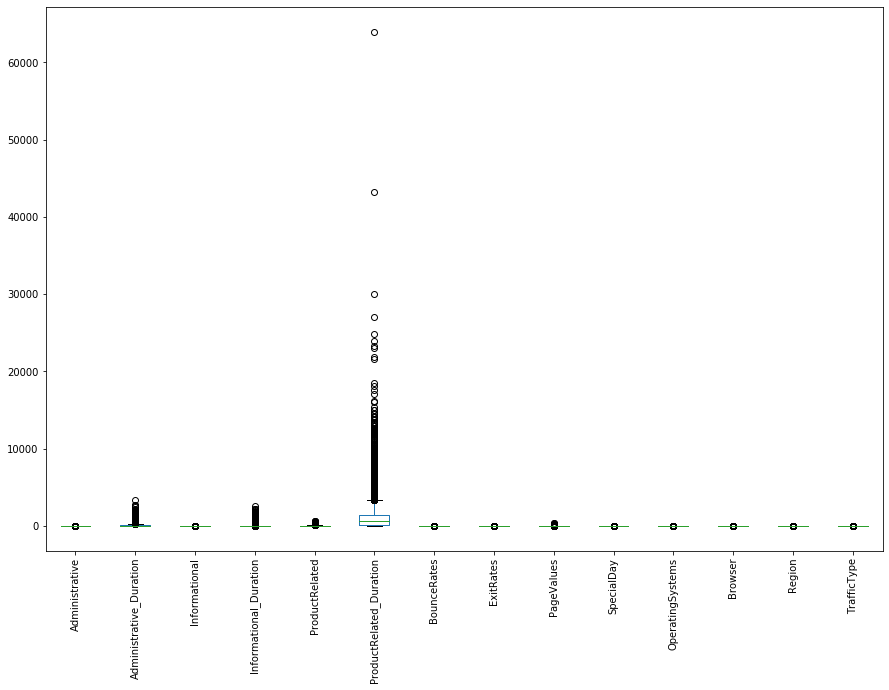

In [10]:
# Checking for the outliers :

df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Removing outliers :

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
df_out = df_out.reset_index(drop=True)
df_out.shape

# Removing outliers removes most of the data, hence use origional data set...

(1914, 18)

In [13]:
# Checking for number of unique values for each feature

uniques = df.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


### Univariate, Bivariate and Multivariate Analysis :

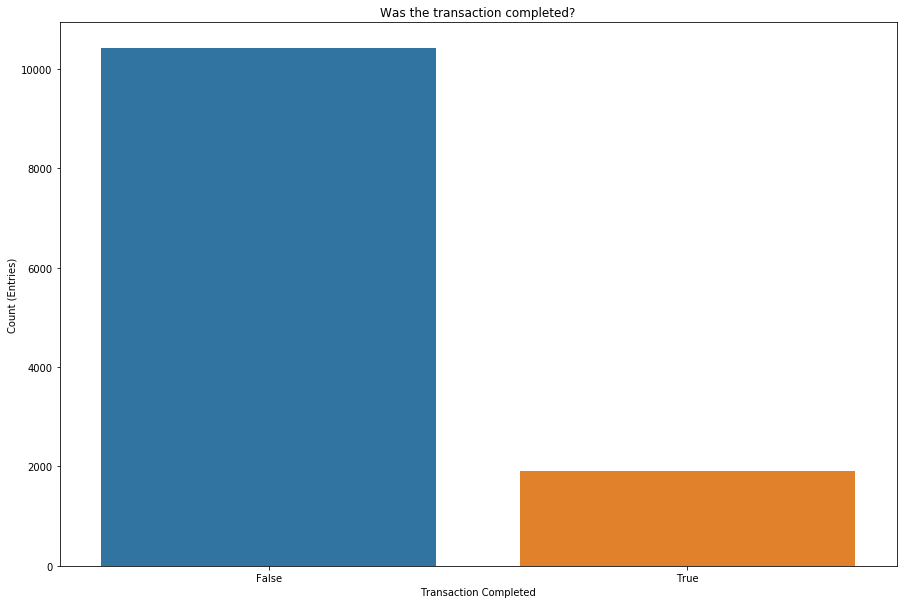

In [15]:
# Visualize the class variable :

sns.countplot(df['Revenue'])
plt.title('Was the transaction completed?')
plt.xlabel('Transaction Completed')
plt.ylabel('Count (Entries)')
plt.show()

# We can see that the number of entries where the customer ended up not purchasing is much higher that the number 
# of entries where the customer ended up completing a transaction. This makes sense, as a majority of normal online 
# shopping ends without a purchase.

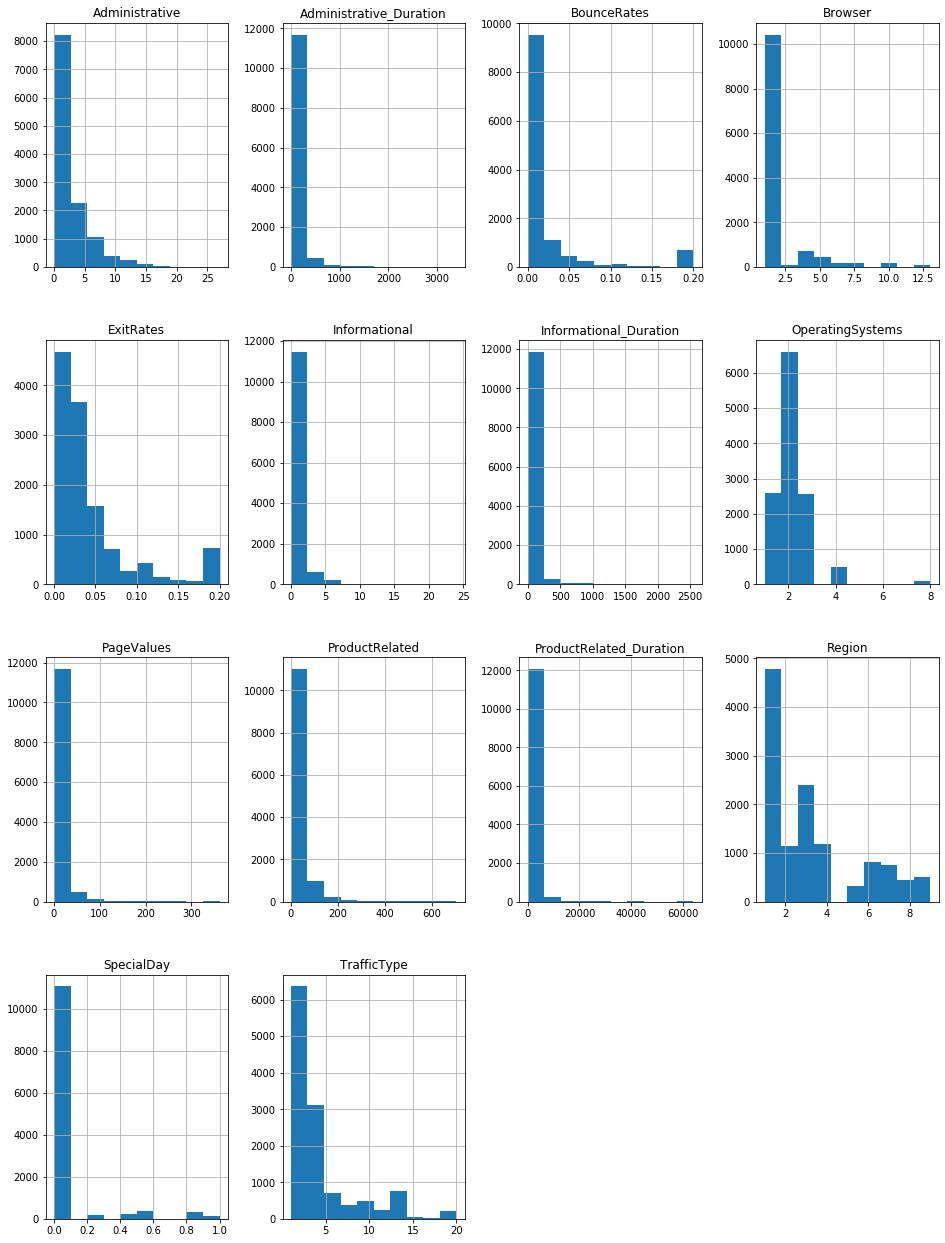

In [17]:
# Distribution of numerical variables :

df.select_dtypes(include=['int64', 'float64']).hist(figsize=(16,22))
plt.show()

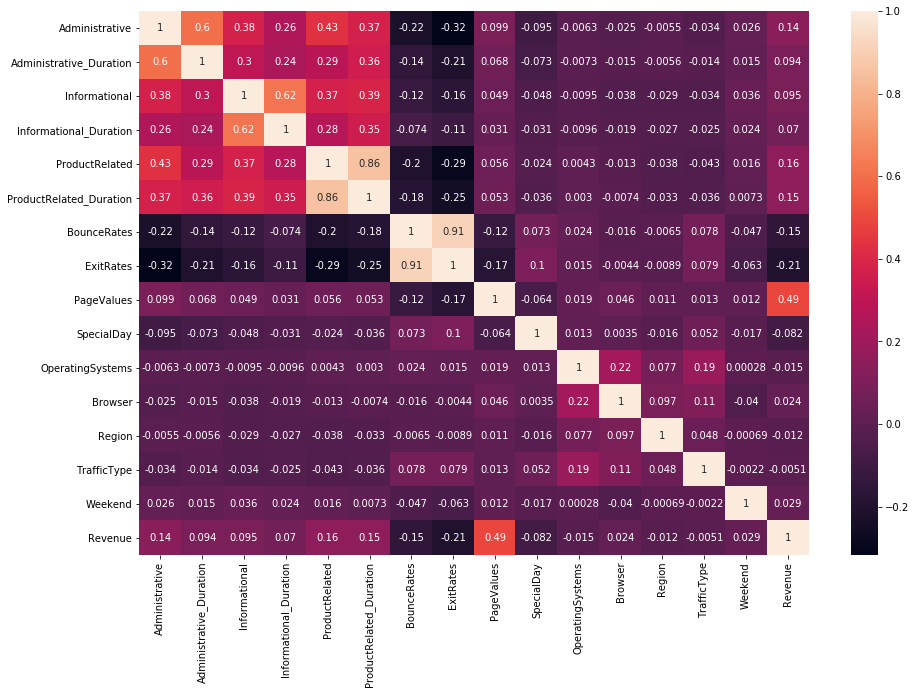

In [18]:
# Correlation :

sns.heatmap(df.corr(), annot=True)
plt.show()

### Encoding :

In [35]:
# Looking at the columns above, there are 8 categorical columns and 10 numerical columns. For the best outcome of our model,

# 1) Categorical columns can be scaled only after encoding :
   # 1) Weekend and Revenue cannot be label encoded since we don't want any heirarchy based on magnitude.
   # 2) Only month can be label encoded since month having heirarchy based on magnitude is not an issue

# 2) Numerical columns ofcourse can be scaled without any encoding needed.

In [36]:
# Seperate numerical and categorical columns :

df_cat = df[['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue']]
df_num = df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated',
                   'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

In [37]:
# Scaled the numeric column :

df_num_scaled = df_num.apply(zscore)

In [38]:
df_category_encoded = pd.get_dummies(df_cat[['VisitorType','Weekend', 'Revenue']])

# Weekend and Revenue are bool, it don't encoded, use function to convert them and remove origionalcols...

In [40]:
def encoding(x):
    if x == True:
        return 1
    else:
        return 0
    
df_category_encoded['Weekend_encoded'] = df_category_encoded['Weekend'].apply(encoding)
df_category_encoded['Revenue_encoded'] = df_category_encoded['Revenue'].apply(encoding)

In [41]:
# Drop the columns :

df_category_encoded = df_category_encoded.drop(['Weekend','Revenue'],axis=1)

In [42]:
# Add into origional category dataframe :

df_category_scaled =pd.concat((df[['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType']],df_category_encoded),axis=1)
df_category_scaled.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,Feb,1,1,1,1,0,0,1,0,0
1,Feb,2,2,1,2,0,0,1,0,0
2,Feb,4,1,9,3,0,0,1,0,0
3,Feb,3,2,2,4,0,0,1,0,0
4,Feb,3,3,1,4,0,0,1,1,0


In [43]:
# Use label encoder for month column :

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_category_scaled['Month'] = le.fit_transform(df_category_scaled['Month'])

In [44]:
# Add scaled categorical and numerical columns :

df_new = pd.concat((df_num_scaled,df_category_scaled),axis=1)
df_new.shape

(12330, 20)

### K-Means Clustering :

In [48]:
# Number of clusters and cluster errors :

cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_new)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'Num_clusters' : cluster_range, 'Cluster_errors' : cluster_errors})
clusters_df

# Looking at the differences between cluster errors, there is a huge difference in error from K = 1 and K = 2. 
# So, we can conclude that optimum no.of clusters is 2

,Num_clusters,Cluster_errors
0,1,516905.684753
1,2,356846.498033
2,3,309735.580090
3,4,274358.694189
4,5,256421.199341
5,6,241550.450323
6,7,232449.196362
7,8,220438.641415
8,9,209766.735781
9,10,201006.941519


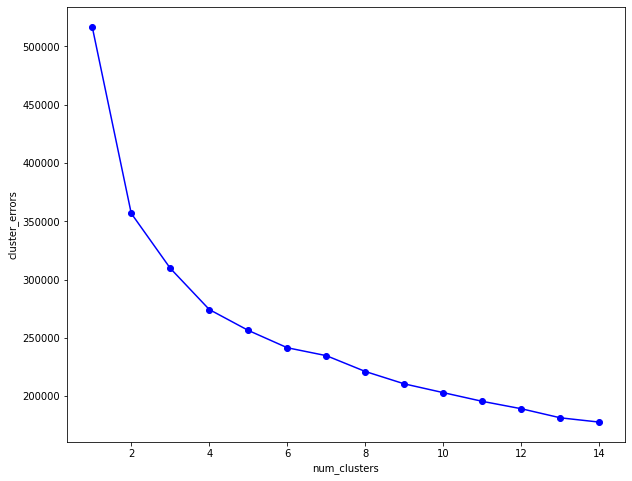

In [47]:
# Elbow plot :

plt.figure(figsize=(10,8))
plt.plot(clusters_df.Num_clusters, clusters_df.Cluster_errors, color='blue', marker='o')
plt.xlabel('num_clusters')
plt.ylabel('cluster_errors')
plt.show()

# It is clear from the elbow plot, there is a steep change of slope at K = 2, hence the no.of clusters is 2.

In [50]:
km = KMeans(n_clusters=2)
km.fit(df_new)
centroids_km = km.cluster_centers_
centroids_km_df = pd.DataFrame(centroids_km,columns=df_new.columns)

centroids_km_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,0.012984,0.003912,0.012084,0.008192,0.011529,0.007068,-0.032872,-0.032303,-0.001182,0.000226,5.139603,2.067553,2.316551,3.120051,2.439437,0.137648,0.002640,0.859713,0.229543,0.153974
1,-0.063215,-0.019048,-0.058834,-0.039885,-0.056131,-0.034413,0.160042,0.157273,0.005756,-0.001098,5.282723,2.398858,2.554498,3.280343,12.006188,0.136126,0.027606,0.836268,0.247501,0.158496


In [51]:
labels_km = km.labels_
labels_km_df = pd.DataFrame({'labels':labels_km})

In [52]:
labels_km_df['labels'].value_counts()

0    10229
1     2101
Name: labels, dtype: int64

In [53]:
g0 = labels_km_df[labels_km_df['labels']==0]
g1 = labels_km_df[labels_km_df['labels']==1]

# Through Centroids we can identify which column belongs to which cluster

### Hierarchical Clustering :

In [56]:
# creating model with complete linkage

from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
agglo.fit(df_new)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [57]:
L = pd.DataFrame(agglo.labels_)
L[0].value_counts()

0    12327
1        3
Name: 0, dtype: int64

In [59]:
# creating model with ward linkage

model1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model1.fit(df_new)

L1 = pd.DataFrame(model1.labels_)
L1[0].value_counts()

0    10211
1     2119
Name: 0, dtype: int64

In [60]:
# creating model with average linkage

model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model2.fit(df_new)

L2 = pd.DataFrame(model2.labels_)
L2[0].value_counts()

0    12327
1        3
Name: 0, dtype: int64

In [61]:
# It is quite clear that ward linkage is giving the best clusters out of all the linkages, hence using ward for 
# creating dendogram :

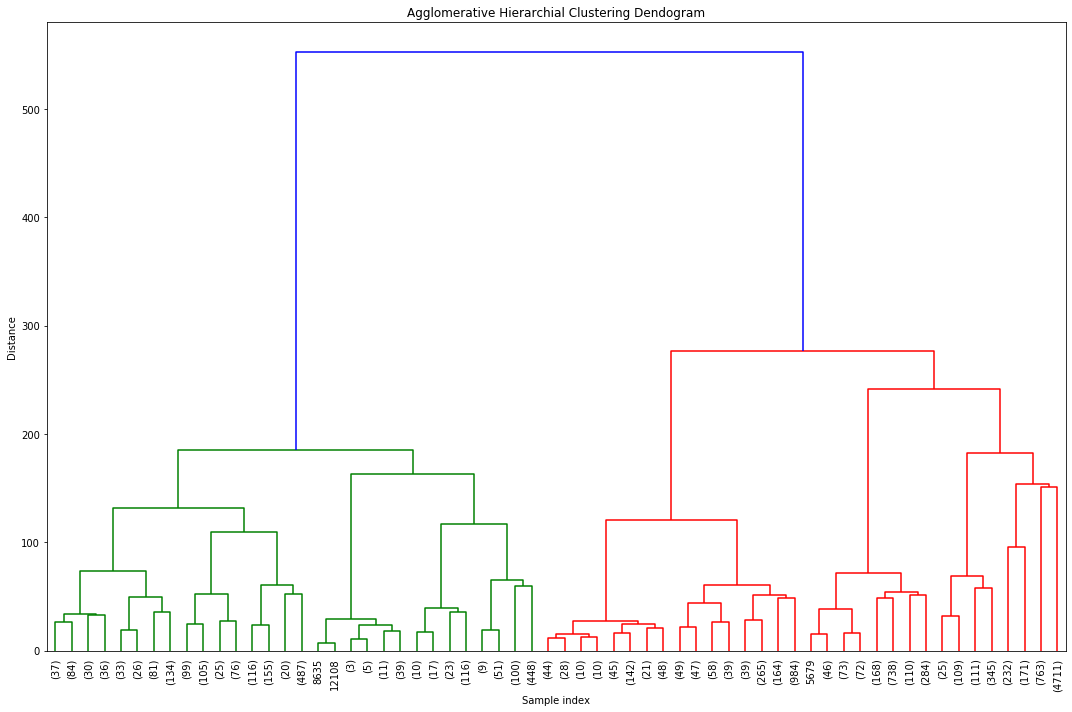

In [63]:
# Dendogram :

from scipy.cluster.hierarchy import linkage, dendrogram

plt.title('Agglomerative Hierarchial Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
Z = linkage(df_new.iloc[:,:-1], 'ward')
dendrogram(Z, leaf_rotation = 90.0, p = 5, color_threshold =400,leaf_font_size = 10, truncate_mode = 'level')
plt.tight_layout()

In [67]:
# Value counts :

print('Origional Data Classes :')
print(df_new.Revenue_encoded.value_counts())
print('-' * 50)
print('K-Means Predicted Data Classes :')
print(labels_km_df.labels.value_counts())
print('-' * 50)
print('Hierarchical Predicted Data Classes :')
print(L1[0].value_counts())

Origional Data Classes :
0    10422
1     1908
Name: Revenue_encoded, dtype: int64
--------------------------------------------------
K-Means Predicted Data Classes :
0    10229
1     2101
Name: labels, dtype: int64
--------------------------------------------------
Hierarchical Predicted Data Classes :
0    10211
1     2119
Name: 0, dtype: int64


### Decision Tree :

In [83]:
# Data preparation :

x = df_new
y = labels_km_df.labels

x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.3, random_state=7)

In [84]:
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier(max_depth = 3)
Dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
# Accuracy score decision tree:

predictvalues_train = Dtree.predict(x_train)
accuracy_train = accuracy_score(y_train, predictvalues_train)

predictvalues_validate =  Dtree.predict(x_validate)
accuracy_validate = accuracy_score(y_validate, predictvalues_validate)

print('Train Accuracy :', accuracy_train)
print('Validation Accuracy :', accuracy_validate)

Train Accuracy : 1.0
Validation Accuracy : 1.0


In [87]:
print('Classification Report :')
print(classification_report(y_validate, predictvalues_validate))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3098
           1       1.00      1.00      1.00       601

    accuracy                           1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699



### PCA :

In [100]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = df_new.drop('Revenue_encoded', axis=1)
X_std = sc.fit_transform(df_new)

In [102]:
cov_matrix = np.cov(X_std.T)
# cov_matrix

In [103]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigen Vectors : \n%s', eig_vecs)
print('Eigen Values : \n%s', eig_vals)

Eigen Vectors : 
%s [[ 3.72272922e-01 -1.32031706e-02  4.10973532e-02 -3.26827984e-02
  -1.65174964e-01 -1.36482403e-01 -4.08110474e-02  4.51367099e-01
  -5.78689458e-01  1.52761949e-02  5.04737630e-03  1.44186676e-02
   8.98171566e-03  6.28788753e-02  1.85763111e-01  2.82469836e-01
  -3.24134893e-01 -1.88138072e-01 -1.14167518e-01 -3.73942750e-17]
 [ 3.17618271e-01 -2.79505270e-02  5.92406786e-02 -1.79109298e-02
   1.46119826e-01 -2.00811201e-01 -3.43217090e-02 -3.07261402e-01
   5.61949722e-01  3.25100112e-02  1.23329046e-03 -1.96931831e-02
   1.70892876e-02  8.02833516e-02  2.55760391e-01  3.39570800e-01
  -3.86136832e-01 -2.45526003e-01 -1.52203423e-01 -1.74050011e-16]
 [ 3.34015528e-01 -1.42493408e-01  7.09578951e-02  1.46540685e-03
  -2.83962835e-02 -2.88284202e-01  2.93121286e-02 -6.29396258e-01
  -3.96012121e-01 -9.35517027e-04  4.67164568e-03  1.51982724e-02
   8.49986797e-02  3.02601786e-02 -8.09257163e-02 -3.75056595e-01
   1.24178102e-01 -8.88595001e-02 -2.15468632e-01  2.0

In [104]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [105]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Varience Explained :', cum_var_exp)

Cumulative Varience Explained : [ 17.48366084  29.24229061  38.11468755  45.36451753  51.97069074
  57.5442247   62.6752673   67.6749409   72.43970879  77.16916237
  81.54777581  85.76811105  89.52958776  92.67528863  95.14543784
  97.2504808   99.00744509  99.62125954 100.         100.        ]


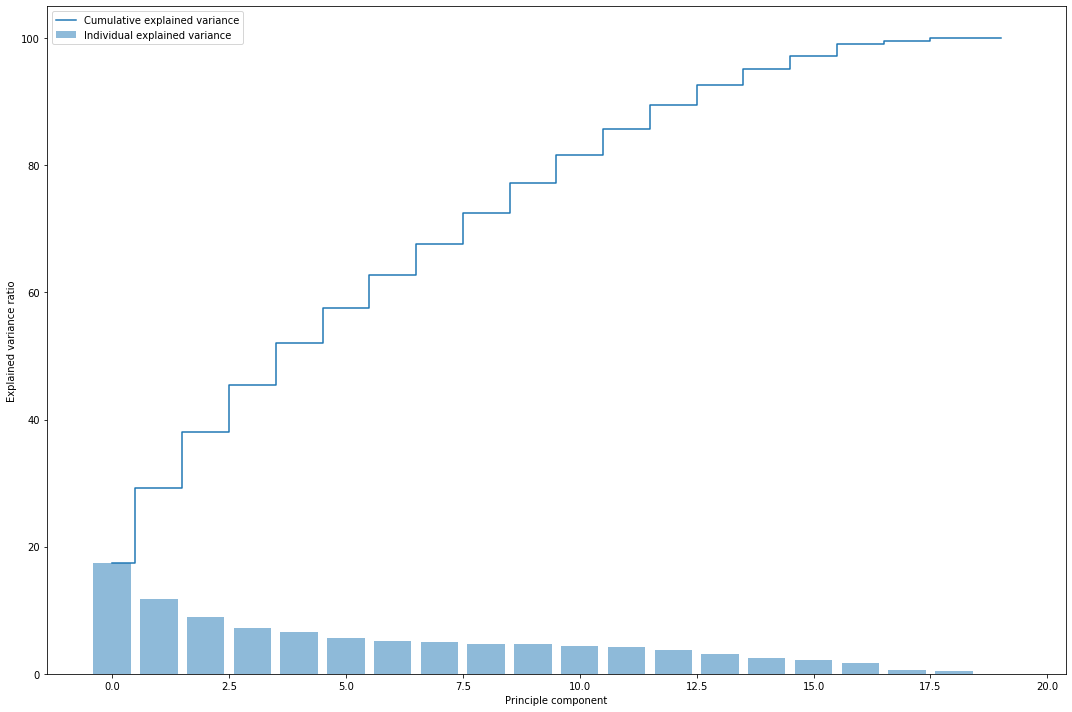

In [106]:
plt.bar(range(20), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(20), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.xlabel('Principle component')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Inference :

* If we see all the metrices, DECISION TREE before PCA has highest and better scores.